In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("predictive_maintenance.csv")

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [10]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [11]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [12]:
new_df=df.drop(['UDI', 'Product ID', 'Type', 'Target'],axis=1)

In [13]:
new_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,No Failure
9996,298.9,308.4,1632,31.8,17,No Failure
9997,299.0,308.6,1645,33.4,22,No Failure
9998,299.0,308.7,1408,48.5,25,No Failure


In [14]:
new_df.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Failure Type                object
dtype: object

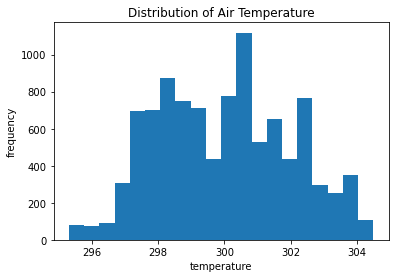

In [15]:
plt.hist(new_df['Air temperature [K]'],bins=20)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.title('Distribution of Air Temperature')
plt.show()

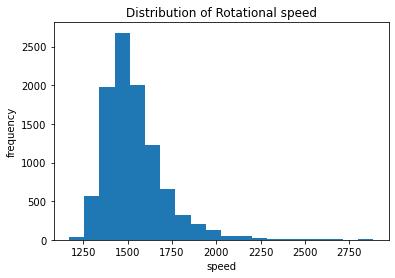

In [16]:
plt.hist(new_df['Rotational speed [rpm]'],bins=20)
plt.xlabel('speed')
plt.ylabel('frequency')
plt.title('Distribution of Rotational speed')
plt.show()

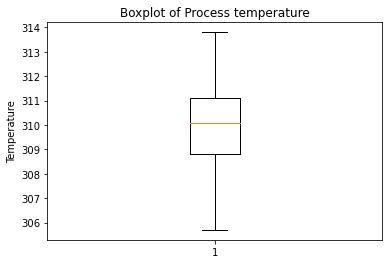

In [17]:
plt.boxplot(new_df['Process temperature [K]'])
plt.title('Boxplot of Process temperature')
plt.ylabel('Temperature')
plt.show()

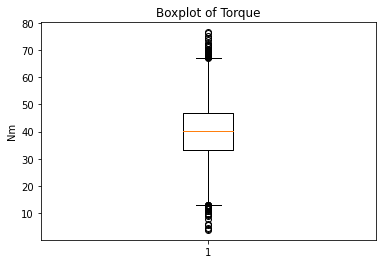

In [18]:
plt.boxplot(new_df['Torque [Nm]'])
plt.title('Boxplot of Torque')
plt.ylabel('Nm')
plt.show()

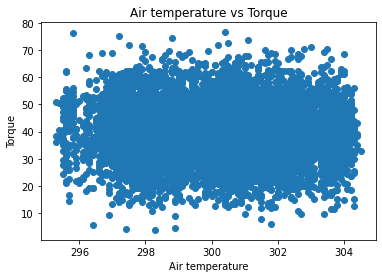

In [19]:
plt.scatter(new_df['Air temperature [K]'],new_df['Torque [Nm]'])
plt.xlabel('Air temperature')
plt.ylabel('Torque')
plt.title('Air temperature vs Torque')
plt.show()

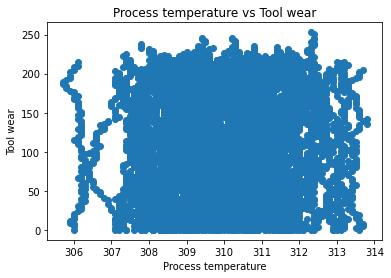

In [20]:
plt.scatter(new_df['Process temperature [K]'],new_df['Tool wear [min]'])
plt.xlabel('Process temperature')
plt.ylabel('Tool wear')
plt.title('Process temperature vs Tool wear')
plt.show()

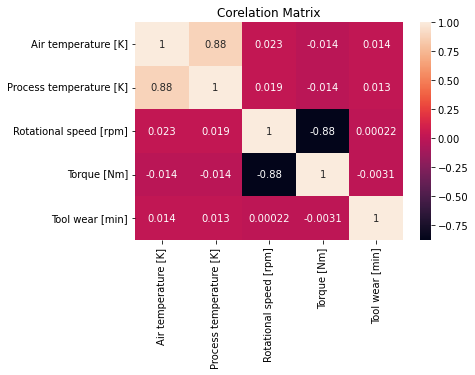

In [21]:
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.title('Corelation Matrix')
plt.show()

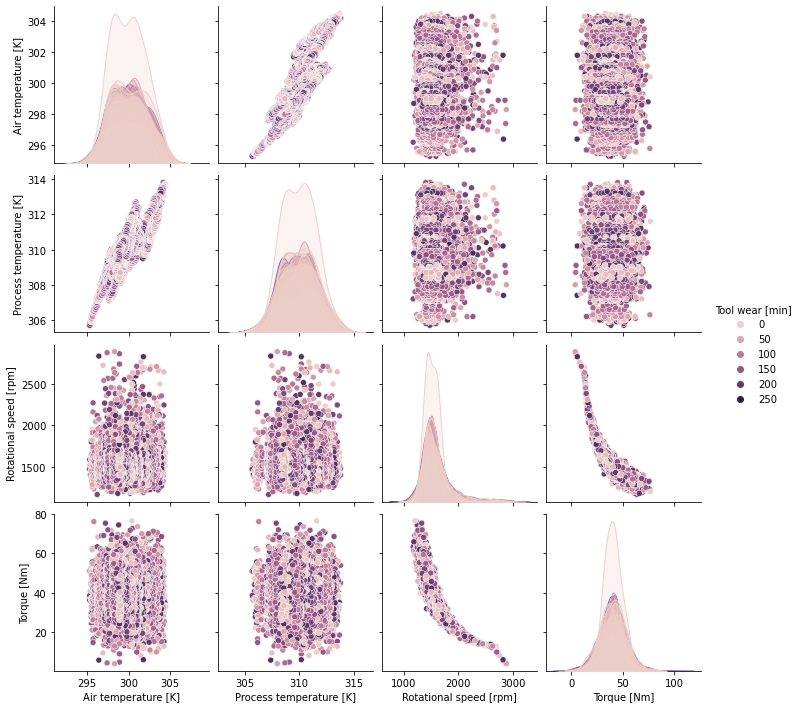

In [22]:
sns.pairplot(new_df,hue='Tool wear [min]')
plt.show()

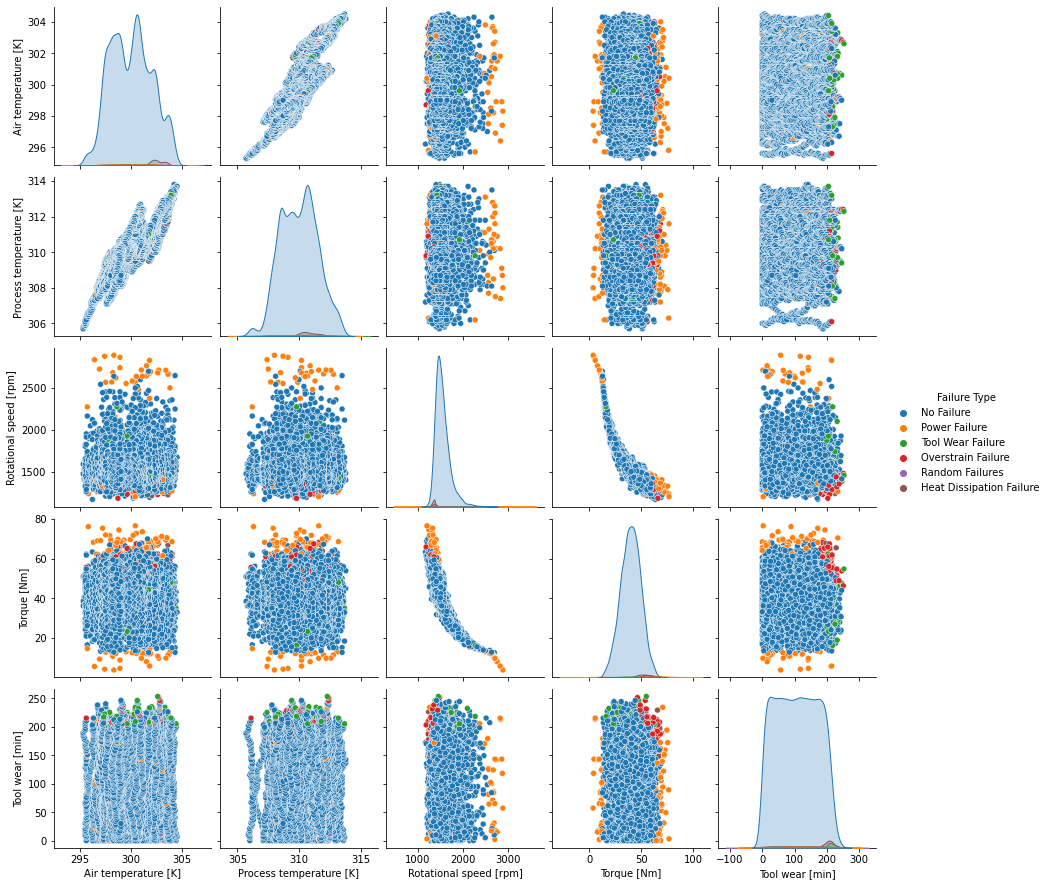

In [23]:
sns.pairplot(new_df,hue='Failure Type')
plt.show()

Finally, we can group the data by the failure variable and calculate the mean of the other variables for each group:

In [24]:
grouped=new_df.groupby('Failure Type').mean()
grouped

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Failure Type,,,,,
Heat Dissipation Failure,302.567857,310.799107,1337.964286,52.778571,107.339286
No Failure,299.972855,309.994343,1540.324389,39.624316,106.678927
Overstrain Failure,299.867949,310.051282,1354.243590,56.878205,208.217949
Power Failure,300.075789,309.954737,1763.968421,48.514737,101.884211
Random Failures,300.766667,310.755556,1489.444444,43.522222,119.888889
Tool Wear Failure,300.288889,310.164444,1570.666667,37.226667,216.555556


 let's plot some histograms to check the distribution of the numerical features
 This will give us an idea of the range of values in each feature, as well as any skewness or outliers

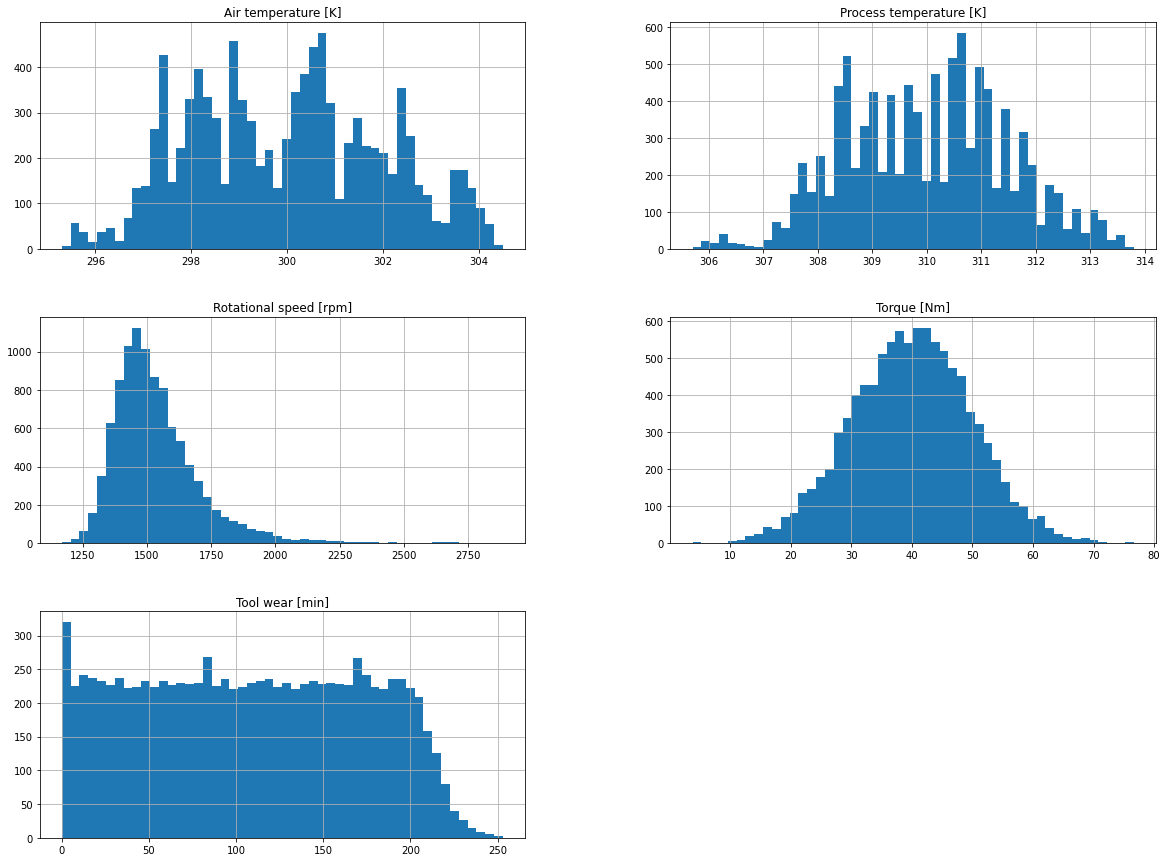

In [25]:
new_df.hist(bins=50,figsize=(20,15))
plt.show()

let's plot some boxplots to check for any outliers
This will help us identify any extreme values that may need to be treated or removed from the dataset

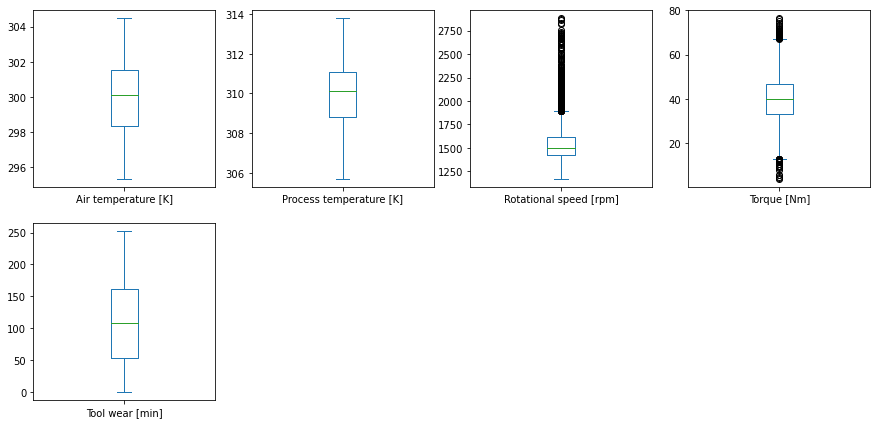

In [26]:
new_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

Calculate rolling statistics such as the mean, standard deviation, and maximum of sensor readings over a certain window of time. This can help capture trends in the data and detect anomalies.

In [27]:
window_size=10
new_df['temp_mean'] = new_df['Air temperature [K]'].rolling(window_size).mean()
new_df['temp_std'] = new_df['Air temperature [K]'].rolling(window_size).std()
new_df['temp_max'] = new_df['Air temperature [K]'].rolling(window_size).max()

In [28]:
window_size=10
new_df['temp_mean'] = new_df['Process temperature [K]'].rolling(window_size).mean()
new_df['temp_std'] = new_df['Process temperature [K]'].rolling(window_size).std()
new_df['temp_max'] = new_df['Process temperature [K]'].rolling(window_size).max()

In [29]:
window_size=10
new_df['rot_mean'] = new_df['Rotational speed [rpm]'].rolling(window_size).mean()
new_df['rot_std'] = new_df['Rotational speed [rpm]'].rolling(window_size).std()
new_df['rot_max'] = new_df['Rotational speed [rpm]'].rolling(window_size).max()

In [30]:
window_size=10
new_df['tor_mean'] = new_df['Torque [Nm]'].rolling(window_size).mean()
new_df['tor_std'] = new_df['Torque [Nm]'].rolling(window_size).std()
new_df['tor_max'] = new_df['Torque [Nm]'].rolling(window_size).max()

In [33]:
window_size=10
new_df['tool_mean'] = new_df['Tool wear [min]'].rolling(window_size).mean()
new_df['tool_std'] = new_df['Tool wear [min]'].rolling(window_size).std()
new_df['tool_max'] = new_df['Tool wear [min]'].rolling(window_size).max()

Create new features by combining existing features. For example, we can multiply the temperature and torque readings to capture their interaction.

In [34]:
new_df['temp_torque_interaction']=new_df['Air temperature [K]']*new_df['Torque [Nm]']

In [35]:
new_df['temp_torque_interaction']

0       12758.68
1       13806.66
2       14726.14
3       11778.90
4       11928.00
          ...   
9995     8814.60
9996     9505.02
9997     9986.60
9998    14501.50
9999    12019.80
Name: temp_torque_interaction, Length: 10000, dtype: float64

In [36]:
new_df.dropna(inplace=True)

In [37]:
# Split the data into features and labels
X = new_df.drop('Failure Type', axis=1)
y =new_df['Failure Type']

we'll split our dataset into training and testing sets. We'll use 80% of the data for training and 20% for testing.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

we'll preprocess our data by scaling the features using a standard scaler.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [44]:
model=LogisticRegression()

In [45]:
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test, y_pred,average='macro')
print(f'Precision: {precision:.4f}')
recall=recall_score(y_test, y_pred,average='macro')
print(f'Recall: {recall:.4f}')
f1=f1_score(y_test, y_pred,average='macro')
print(f'F1: {f1:.4f}')

Accuracy: 0.9690
Precision: 0.4847
Recall: 0.3943
F1: 0.4258


/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can train a machine learning model on our training data. Here, we'll use a Random Forest Classifier as an example.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

we'll evaluate our model on the testing data by calculating its accuracy, precision, recall, and F1 score.

In [48]:
y_pred=rf.predict(X_test_scaled)

In [49]:
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test, y_pred,average='macro')
print(f'Precision: {precision:.4f}')
recall=recall_score(y_test, y_pred,average='macro')
print(f'Recall: {recall:.4f}')
f1=f1_score(y_test, y_pred,average='macro')
print(f'F1: {f1:.4f}')

Accuracy: 0.9720
Precision: 0.5320
Recall: 0.4211
F1: 0.4603


/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf=DecisionTreeClassifier()

In [52]:
clf.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [53]:
y_pred=clf.predict(X_test_scaled)

In [54]:
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test, y_pred,average='macro')
print(f'Precision: {precision:.4f}')
recall=recall_score(y_test, y_pred,average='macro')
print(f'Recall: {recall:.4f}')
f1=f1_score(y_test, y_pred,average='macro')
print(f'F1: {f1:.4f}')

Accuracy: 0.9700
Precision: 0.5278
Recall: 0.5226
F1: 0.5163


In [58]:
from sklearn.metrics import confusion_matrix

In [70]:
cm=confusion_matrix(y_test,y_pred)

In [71]:
print(cm)

[[  13   12    0    1    0    0]
 [   3 1911    2    3    0    0]
 [   0   12    5    0    0    0]
 [   0    4    1   14    0    0]
 [   0    4    0    0    0    0]
 [   0   14    0    0    0    0]]


In [72]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.81      0.50      0.62        26
              No Failure       0.98      1.00      0.99      1919
      Overstrain Failure       0.62      0.29      0.40        17
           Power Failure       0.78      0.74      0.76        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00        14

                accuracy                           0.97      1999
               macro avg       0.53      0.42      0.46      1999
            weighted avg       0.96      0.97      0.97      1999



/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aawajghimire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)